## Adding noise to the linear model


Consensus dynamics without noise:

$\dot{\mathbf{x}} = -L \mathbf{x}$

Consensus dynamics with noise:

$\dot{\mathbf{x}}  = -L \mathbf{x} + \epsilon$

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
import pylab

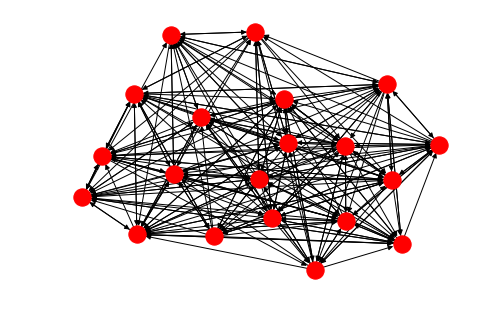

In [2]:
er = nx.erdos_renyi_graph(directed=True, n=20, p=np.random.rand(1)[0])

nx.draw(er)
plt.show()

In [3]:
for u,v,a in er.edges(data=True):
    a['weight'] = 2*np.random.rand(1)[0] - 1

for i, n in er.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0]-1

In [4]:
A = nx.adjacency_matrix(er)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A

#### initial conditions

In [5]:
dt = 0.002
u = 0.9
N = nx.number_of_nodes(er)
n_iter = 1000
x = np.zeros((n_iter, N))
y = np.zeros((n_iter, N))
noise_mean = 0
noise_var = 1e-4


x[0] = np.repeat(0.5, N) #np.random.rand(N)
y[0] = x[0]


#### with noise

In [6]:
for iter in np.arange(0,n_iter-1):
    dxdt = -L.dot(x[iter]) + np.random.normal(loc=noise_mean, scale=noise_var, size=N)
    x[iter+1] = x[iter] + dxdt*dt

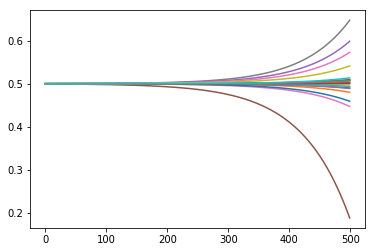

In [7]:
for i in np.arange(N):
    plt.plot(x[500:,i])
plt.show()

In [8]:
np.linalg.matrix_rank(D-A)

19

#### without noise

In [9]:
for iter in np.arange(0,n_iter-1):
    # pitchfork
    dxdt = -L.dot(y[iter])
    y[iter+1] = y[iter] + dxdt*dt

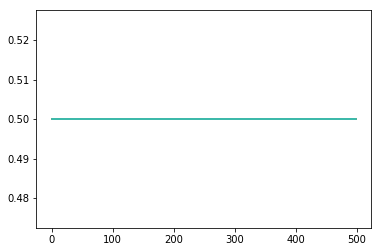

In [10]:
for i in np.arange(N):
    plt.plot(y[500:,i])
plt.show()

In [11]:
nx.degree_centrality(er)

{0: 1.3157894736842104,
 1: 1.3157894736842104,
 2: 1.263157894736842,
 3: 1.0,
 4: 1.3157894736842104,
 5: 1.263157894736842,
 6: 1.1052631578947367,
 7: 1.263157894736842,
 8: 1.263157894736842,
 9: 1.0526315789473684,
 10: 1.263157894736842,
 11: 1.3157894736842104,
 12: 1.1052631578947367,
 13: 1.2105263157894737,
 14: 1.3157894736842104,
 15: 1.4736842105263157,
 16: 1.3684210526315788,
 17: 1.1578947368421053,
 18: 1.4736842105263157,
 19: 1.2105263157894737}

In [12]:
nx.out_degree_centrality(er)

{0: 0.6842105263157894,
 1: 0.7368421052631579,
 2: 0.6842105263157894,
 3: 0.47368421052631576,
 4: 0.6842105263157894,
 5: 0.631578947368421,
 6: 0.6842105263157894,
 7: 0.6842105263157894,
 8: 0.6842105263157894,
 9: 0.47368421052631576,
 10: 0.5789473684210527,
 11: 0.6842105263157894,
 12: 0.5789473684210527,
 13: 0.5263157894736842,
 14: 0.5789473684210527,
 15: 0.6842105263157894,
 16: 0.7894736842105263,
 17: 0.5263157894736842,
 18: 0.631578947368421,
 19: 0.5263157894736842}

In [13]:
nx.eigenvector_centrality(er)

{0: 0.22070194976749583,
 1: 0.2063934072997163,
 2: 0.20385833735757197,
 3: 0.18390775956739217,
 4: 0.22209566838133807,
 5: 0.2186471700510853,
 6: 0.15421275530840894,
 7: 0.2043147395601355,
 8: 0.20415236490444907,
 9: 0.197209392726808,
 10: 0.2383769518392194,
 11: 0.22076041246212486,
 12: 0.19131983162537322,
 13: 0.24162743330517825,
 14: 0.2618227176741757,
 15: 0.27871032840214965,
 16: 0.20633534681098487,
 17: 0.23346774693903974,
 18: 0.29413524408431047,
 19: 0.2443559304536636}

In [14]:
u, s, v = np.linalg.svd(D-A)
s

array([7.06224437e+00, 6.15469719e+00, 4.91724212e+00, 4.80494415e+00,
       4.50529780e+00, 4.04111816e+00, 3.04454666e+00, 2.75823775e+00,
       2.51690259e+00, 2.26536772e+00, 2.07358675e+00, 2.02603364e+00,
       1.63904006e+00, 1.41205222e+00, 1.24193505e+00, 1.05546337e+00,
       8.86109101e-01, 6.06837436e-01, 5.87285196e-02, 3.95645537e-16])

In [15]:
nnodes = er.number_of_nodes()
deg = sum(d for n, d in er.in_degree()) / float(nnodes)
print(deg)
#info += "Average in degree: %8.4f\n" % deg
deg = sum(d for n, d in er.out_degree()) / float(nnodes)
print(deg)
#info += "Average out degree: %8.4f" % deg

11.9
11.9


In [16]:
[er.in_degree(i) for i in er.nodes()]

[12, 11, 11, 10, 12, 12, 8, 11, 11, 11, 13, 12, 10, 13, 14, 15, 11, 12, 16, 13]

In [17]:
np.sum(A, axis=1)

matrix([[ 1.50742314],
        [ 1.03837988],
        [ 3.61580714],
        [-0.57521077],
        [ 1.04980653],
        [ 0.35867844],
        [ 1.18323979],
        [-4.14082724],
        [ 1.3188069 ],
        [-1.49670353],
        [-0.73288523],
        [ 3.11557723],
        [ 0.07235917],
        [ 0.94252312],
        [-4.16873732],
        [-5.91076834],
        [-0.85935752],
        [-0.23885782],
        [-4.92731061],
        [ 2.40767701]])

In [18]:
x[999,:]

array([0.50217754, 0.48005934, 0.50856298, 0.48997024, 0.48896586,
       0.50917876, 0.44712777, 0.64762039, 0.49741804, 0.49352022,
       0.45919261, 0.50663326, 0.50771177, 0.50094773, 0.59882903,
       0.18788024, 0.57301011, 0.50651687, 0.54126293, 0.51344857])

In [19]:
x[0,:]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])